In [1]:
from util.load_dataframes import load_dataframe_vacas, load_dataframe_patadas, load_dataframe_inventario, load_dataframe_reporte, load_dataframe_ranking


df = load_dataframe_vacas('datos/registros_sesiones_merged.csv')
# df = df.sample(frac=1)
df.head()

ID Fecha y hora de inicio              Main                   \
  ID Vaca                  fecha      hora  Accion Duracion (mm:ss)   
0    1204             2025-03-02  02:24:00  Ordeño  0 days 00:07:23   
1    1204             2025-03-02  19:51:00  Ordeño  0 days 00:08:29   
2    1204             2025-03-03  06:00:00  Ordeño  0 days 00:05:05   
3    1204             2025-03-04  00:16:00  Ordeño  0 days 00:09:07   
4    1204             2025-03-04  18:27:00  Ordeño  0 days 00:12:09   

                            Estado                                           \
  Produccion (kg) Numero de ordeño Patada Incompleto Pezones no encontrados   
0           11.13              1.0      0          0                      0   
1           20.64              2.0      0          0                      0   
2            9.59              1.0      0          0                      0   
3           22.58              1.0      0          0                      0   
4           22.71              2.0      0          0                      0   

   ... Flujos maximos (kg/min)       Producciones (kg)                    \
   ...                      TD Total                DI    DD    TI    TD   
0  ...                    1.92  7.92              4.40  2.43  1.15  3.15   
1  ...                    2.40  9.24              5.72  4.88  3.10  6.94   
2  ...                    1.98  8.16              2.69  2.41  1.44  3.05   
3  ...                    1.98  8.64              6.05  5.05  3.58  7.90   
4  ...                    2.28  8.76              6.26  5.31  3.47  7.67   

                      Misc                
   Total  Suavizado  EO/PO Destino Leche  
0  11.13  15.385671  VMS 3        Tanque  
1  20.64  15.385671  VMS 3        Tanque  
2   9.59  15.385671  VMS 3        Tanque  
3  22.58  15.385671  VMS 3        Tanque  
4  22.71  15.385671  VMS 3        Tanque  

[5 rows x 40 columns]

In [2]:
import pandas as pd

df_ranking = load_dataframe_ranking('datos/ranking_vacas_df_final.csv')[['ID Vaca', 'Puntaje_final']]

df_ranking.columns = pd.MultiIndex.from_tuples([
    ('Ranking', 'ID Vaca'),
    ('Ranking', 'PuntajeFinal')
])

df_ranking.head()

Ranking             
  ID Vaca PuntajeFinal
0    1554     0.706908
1    6238     0.674661
2    6003     0.666182
3    8758     0.634178
4    1204     0.622022

In [3]:
from util.generate_data import fill_missing_data

df_filled = fill_missing_data(df)

df_filled.head()

Total de filas: 7237
Filas con 'Ordeño' (se rellenarán): 7004
Filas con 'Rechazada' (se mantendrán sin cambios): 233

Total de filas en el dataset final: 7237


ID Fecha y hora de inicio              Main                   \
  ID Vaca                  fecha      hora  Accion Duracion (mm:ss)   
0    1204             2025-03-02  02:24:00  Ordeño  0 days 00:07:23   
1    1204             2025-03-02  19:51:00  Ordeño  0 days 00:08:29   
2    1204             2025-03-03  06:00:00  Ordeño  0 days 00:05:05   
3    1204             2025-03-04  00:16:00  Ordeño  0 days 00:09:07   
4    1204             2025-03-04  18:27:00  Ordeño  0 days 00:12:09   

                            Estado                                           \
  Produccion (kg) Numero de ordeño Patada Incompleto Pezones no encontrados   
0           11.13              1.0      0          0                      0   
1           20.64              2.0      0          0                      0   
2            9.59              1.0      0          0                      0   
3           22.58              1.0      0          0                      0   
4           22.71              2.0      0          0                      0   

   ... Flujos maximos (kg/min)       Producciones (kg)                    \
   ...                      TD Total                DI    DD    TI    TD   
0  ...                    1.92  7.92              4.40  2.43  1.15  3.15   
1  ...                    2.40  9.24              5.72  4.88  3.10  6.94   
2  ...                    1.98  8.16              2.69  2.41  1.44  3.05   
3  ...                    1.98  8.64              6.05  5.05  3.58  7.90   
4  ...                    2.28  8.76              6.26  5.31  3.47  7.67   

                      Misc                
   Total  Suavizado  EO/PO Destino Leche  
0  11.13  15.385671  VMS 3        Tanque  
1  20.64  15.385671  VMS 3        Tanque  
2   9.59  15.385671  VMS 3        Tanque  
3  22.58  15.385671  VMS 3        Tanque  
4  22.71  15.385671  VMS 3        Tanque  

[5 rows x 40 columns]

In [4]:
from util.generate_summary import generate_summary, save_dataframe 

df_summary = generate_summary(df_filled)
df_summary.head()

c:\Users\diego\Documents\Uni\SeptimoSem\Proyecto\Reto-ConcentracionIA-Vacas\util\generate_summary.py:117: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.13408263199786422' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  datosPorVaca.loc[datosPorVaca['ID'] == vaca, 'TasaDecaemientoProduccion'] = slope
c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


ID            Main           Estado            \
  ID Vaca Produccion (kg) Numero de ordeño      Ubre   
0    1204       14.152335         1.443580  0.214008   
1    1221       14.217778         1.858025  0.024691   
2    1233        9.786182         1.537162  0.097973   
3    1497        2.600000         0.500000  0.000000   
4    1554       18.642554         1.758993  0.201439   

  Media de los flujos (kg/min)                                          \
                            DI        DD        TI        TD     Total   
0                     1.312693  1.615121  1.572471  1.630806  6.016576   
1                     1.301852  0.849259  1.107205  1.140368  4.364074   
2                     1.235294  1.101050  0.955044  1.321617  4.185000   
3                     0.390000  0.300000  0.330000  0.300000  1.320000   
4                     1.683858  1.450072  1.566024  1.592744  6.105324   

  Sangre (ppm)  ... Datos Generados                                           \
            DI  ... NoEncontradosTI NoEncontradosTotal patadas_TI patadas_TD   
0     4.754864  ...            16.0               21.0          0          0   
1   107.012346  ...             2.0                6.0          1          3   
2     0.000000  ...           111.0              127.0         13         29   
3  3998.500000  ...             0.0                0.0          0          0   
4     2.769784  ...            25.0               36.0          3         24   

                                                                      \
  patadas_DI patadas_DD patadas_total PatadasPorDia PatadasPorOrdeño   
0         16          0            16      0.115108         0.062257   
1         17          0            21      0.150000         0.129630   
2         14          3            59      0.421429         0.199324   
3          0          0             0      0.000000         0.000000   
4          2          0            29      0.207143         0.104317   

                  
  PatadasPorHora  
0       0.503668  
1       1.070230  
2       1.465282  
3       0.000000  
4       0.785069  

[5 rows x 58 columns]

In [5]:
save_dataframe(df_summary, 'datos/resumen_vacas.csv')

Archivo guardado exitosamente


In [6]:
df_ranking_indexed = df_ranking.set_index(('Ranking', 'ID Vaca'))

df_final = df_summary.set_index(('ID', 'ID Vaca')).join(
    df_ranking_indexed,
    how='left'
).reset_index()

df_final.head()

ID            Main           Estado            \
  ID Vaca Produccion (kg) Numero de ordeño      Ubre   
0    1204       14.152335         1.443580  0.214008   
1    1221       14.217778         1.858025  0.024691   
2    1233        9.786182         1.537162  0.097973   
3    1497        2.600000         0.500000  0.000000   
4    1554       18.642554         1.758993  0.201439   

  Media de los flujos (kg/min)                                          \
                            DI        DD        TI        TD     Total   
0                     1.312693  1.615121  1.572471  1.630806  6.016576   
1                     1.301852  0.849259  1.107205  1.140368  4.364074   
2                     1.235294  1.101050  0.955044  1.321617  4.185000   
3                     0.390000  0.300000  0.330000  0.300000  1.320000   
4                     1.683858  1.450072  1.566024  1.592744  6.105324   

  Sangre (ppm)  ...    Datos Generados                                   \
            DI  ... NoEncontradosTotal patadas_TI patadas_TD patadas_DI   
0     4.754864  ...               21.0          0          0         16   
1   107.012346  ...                6.0          1          3         17   
2     0.000000  ...              127.0         13         29         14   
3  3998.500000  ...                0.0          0          0          0   
4     2.769784  ...               36.0          3         24          2   

                                                                          \
  patadas_DD patadas_total PatadasPorDia PatadasPorOrdeño PatadasPorHora   
0          0            16      0.115108         0.062257       0.503668   
1          0            21      0.150000         0.129630       1.070230   
2          3            59      0.421429         0.199324       1.465282   
3          0             0      0.000000         0.000000       0.000000   
4          0            29      0.207143         0.104317       0.785069   

       Ranking  
  PuntajeFinal  
0     0.622022  
1     0.581024  
2     0.487947  
3     0.133646  
4     0.706908  

[5 rows x 59 columns]

In [7]:
df_final.columns

MultiIndex([(                          'ID',                   'ID Vaca'),
            (                        'Main',           'Produccion (kg)'),
            (                      'Estado',          'Numero de ordeño'),
            (                      'Estado',                      'Ubre'),
            ('Media de los flujos (kg/min)',                        'DI'),
            ('Media de los flujos (kg/min)',                        'DD'),
            ('Media de los flujos (kg/min)',                        'TI'),
            ('Media de los flujos (kg/min)',                        'TD'),
            ('Media de los flujos (kg/min)',                     'Total'),
            (                'Sangre (ppm)',                        'DI'),
            (                'Sangre (ppm)',                        'DD'),
            (                'Sangre (ppm)',                        'TI'),
            (                'Sangre (ppm)',                        'TD'),
            (            

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   (ID, ID Vaca)                                 33 non-null     int64  
 1   (Main, Produccion (kg))                       33 non-null     float64
 2   (Estado, Numero de ordeño)                    33 non-null     float64
 3   (Estado, Ubre)                                33 non-null     float64
 4   (Media de los flujos (kg/min), DI)            33 non-null     float64
 5   (Media de los flujos (kg/min), DD)            33 non-null     float64
 6   (Media de los flujos (kg/min), TI)            33 non-null     float64
 7   (Media de los flujos (kg/min), TD)            33 non-null     float64
 8   (Media de los flujos (kg/min), Total)         33 non-null     float64
 9   (Sangre (ppm), DI)                            33 non-null     float

✓ Modelo Isolation Forest entrenado
Anomalías detectadas: 4
Vacas normales: 29

 Top 10 vacas con mayor puntuación de anomalía:
        ID      Ranking IsolationForest
   ID Vaca PuntajeFinal           Score
3     1497     0.133646       -0.659040
24    8732     0.396328       -0.541348
13    6003     0.666182       -0.531469
27    8771     0.508331       -0.523994
25    8755     0.320135       -0.516007
20    6238     0.674661       -0.509567
30    8782     0.293433       -0.495381
31    8792     0.489430       -0.491529
16    6191     0.504312       -0.479116
10    2076     0.605472       -0.468138


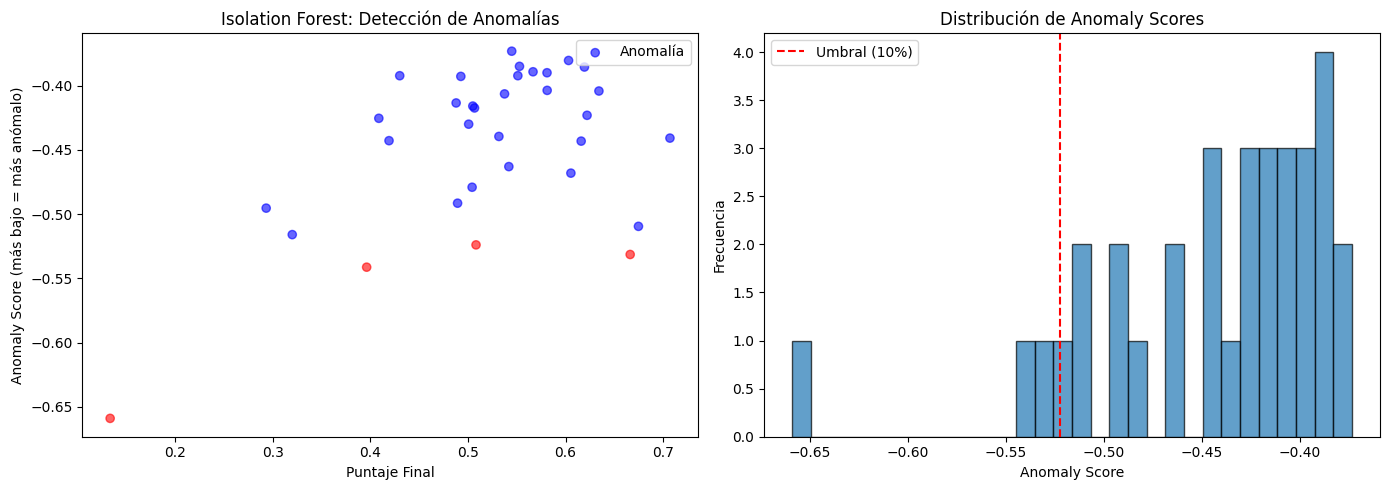


✓ Archivo guardado: datos/df_final_con_anomalias.csv


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Preparar datos
# Excluir ID Vaca y PuntajeFinal de las features
exclude_cols = [('ID', 'ID Vaca'), ('Ranking', 'PuntajeFinal')]
feature_cols = [col for col in df_final.columns if col not in exclude_cols]

# Extraer features y target
X = df_final[feature_cols].copy()
y = df_final[('Ranking', 'PuntajeFinal')].copy()

# Rellenar NaN con 0
X = X.fillna(0)
y = y.fillna(0)

# Normalizar features (recomendado para Isolation Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear y entrenar modelo Isolation Forest
iso_forest = IsolationForest(
    contamination=0.1,  # porcentaje esperado de anomalías (10%)
    random_state=42,
    n_estimators=100
)

# Predecir anomalías (-1 = anomalía, 1 = normal)
y_pred = iso_forest.fit_predict(X_scaled)
y_scores = iso_forest.score_samples(X_scaled)  # puntuación de anomalía

# Añadir resultados a df_final
df_final[('IsolationForest', 'Anomalia')] = y_pred
df_final[('IsolationForest', 'Score')] = y_scores

# Mostrar resumen
print("✓ Modelo Isolation Forest entrenado")
print(f"Anomalías detectadas: {(y_pred == -1).sum()}")
print(f"Vacas normales: {(y_pred == 1).sum()}")

# Ver las vacas con mayor probabilidad de anomalía (scores más bajos)
print("\n Top 10 vacas con mayor puntuación de anomalía:")
anomalies = df_final.nsmallest(10, ('IsolationForest', 'Score'))[
    [('ID', 'ID Vaca'), ('Ranking', 'PuntajeFinal'), ('IsolationForest', 'Score')]
]
print(anomalies)

# Visualizar
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: PuntajeFinal vs Score de anomalía
colors = ['red' if x == -1 else 'blue' for x in y_pred]
axes[0].scatter(df_final[('Ranking', 'PuntajeFinal')], 
                df_final[('IsolationForest', 'Score')], 
                c=colors, alpha=0.6)
axes[0].set_xlabel('Puntaje Final')
axes[0].set_ylabel('Anomaly Score (más bajo = más anómalo)')
axes[0].set_title('Isolation Forest: Detección de Anomalías')
axes[0].legend(['Anomalía', 'Normal'])

# Histograma de scores
axes[1].hist(y_scores, bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(np.percentile(y_scores, 10), color='red', linestyle='--', label='Umbral (10%)')
axes[1].set_xlabel('Anomaly Score')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Anomaly Scores')
axes[1].legend()

plt.tight_layout()
plt.show()

# Guardar resultado
df_final.to_csv('datos/df_final_con_anomalias.csv', index=False)
print("\n✓ Archivo guardado: datos/df_final_con_anomalias.csv")

✓ Modelo Random Forest entrenado
R² Train: 0.9215
R² Test: 0.1081
MSE Test: 0.0018
MAE Test: 0.0379

Top 30 features más importantes:
                                             feature  importance
22              ('Flujos maximos (kg/min)', 'Total')    0.360631
7          ('Media de los flujos (kg/min)', 'Total')    0.091142
19                 ('Flujos maximos (kg/min)', 'DD')    0.071012
15                 ('Conductividad (mS / cm)', 'TI')    0.046096
6             ('Media de los flujos (kg/min)', 'TD')    0.040269
27                    ('Producciones (kg)', 'Total')    0.040220
13                 ('Conductividad (mS / cm)', 'DI')    0.040042
20                 ('Flujos maximos (kg/min)', 'TI')    0.031924
3             ('Media de los flujos (kg/min)', 'DI')    0.029698
14                 ('Conductividad (mS / cm)', 'DD')    0.027830
5             ('Media de los flujos (kg/min)', 'TI')    0.026792
23                       ('Producciones (kg)', 'DI')    0.024901
4             ('Media

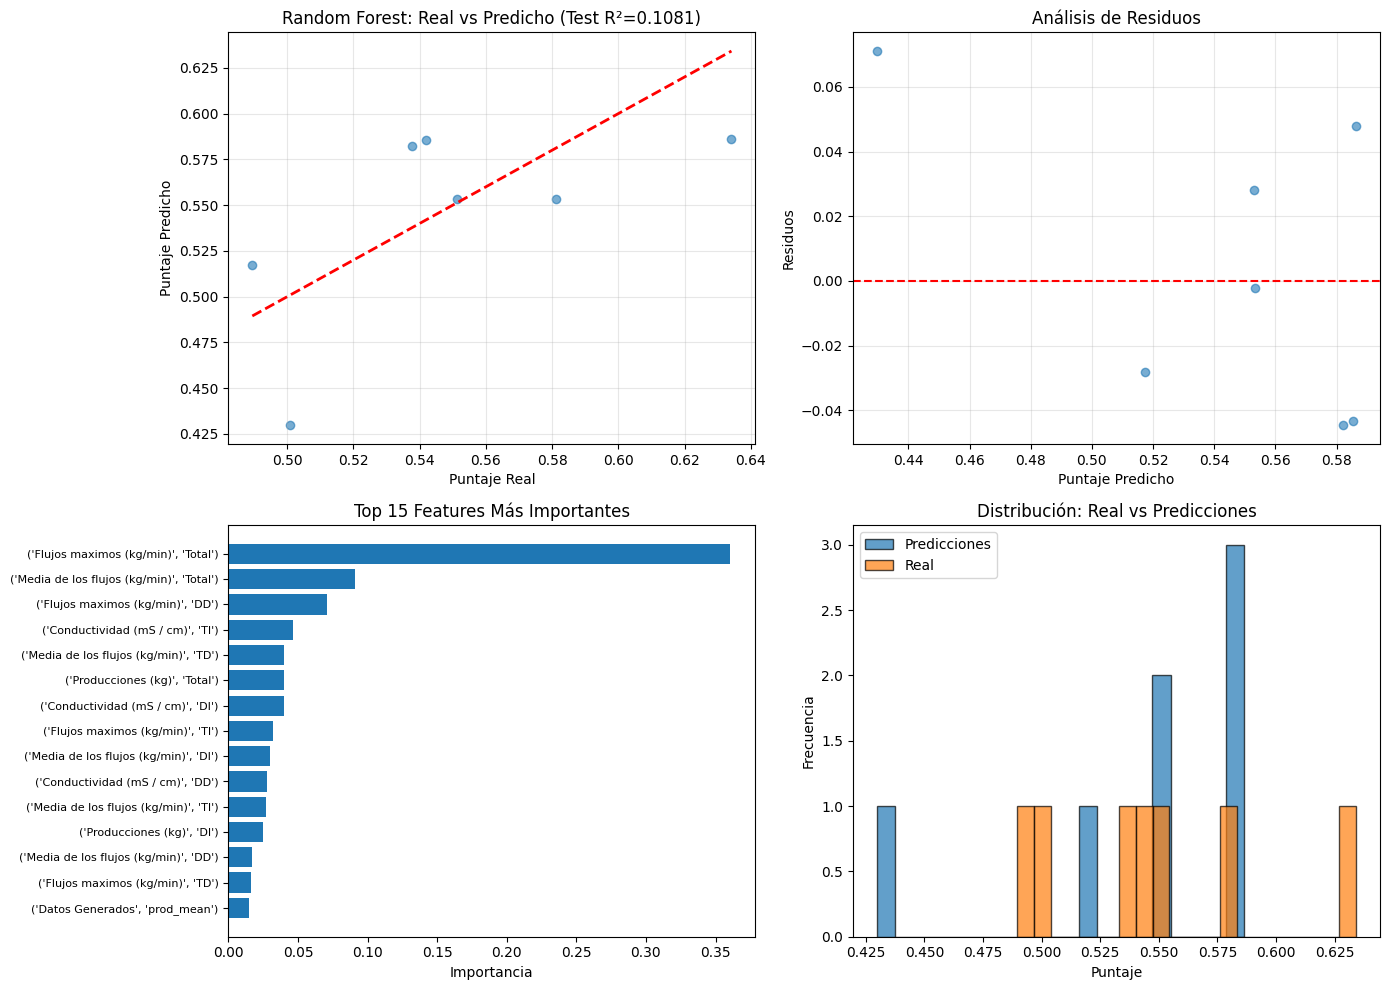


✓ Modelo guardado: datos/random_forest_model.pkl


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparar datos
# Excluir ID Vaca y PuntajeFinal de las features
exclude_cols = [('ID', 'ID Vaca'), ('Ranking', 'PuntajeFinal')]
feature_cols = [col for col in df_final.columns if col not in exclude_cols]

# Extraer features y target
X = df_final[feature_cols].copy()
y = df_final[('Ranking', 'PuntajeFinal')].copy()

# Rellenar NaN con 0
X = X.fillna(0)
y = y.fillna(0)

# Dividir en train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,          # número de árboles
    max_depth=10,              # profundidad máxima
    min_samples_split=5,       # muestras mínimas para dividir
    min_samples_leaf=2,        # muestras mínimas en hoja
    random_state=42,
    n_jobs=-1                  # usar todos los procesadores
)

# Entrenar
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluación
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("✓ Modelo Random Forest entrenado")
print(f"R² Train: {r2_train:.4f}")
print(f"R² Test: {r2_test:.4f}")
print(f"MSE Test: {mse_test:.4f}")
print(f"MAE Test: {mae_test:.4f}")

# Importancia de features
feature_importance = pd.DataFrame({
    'feature': [str(col) for col in feature_cols],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 30 features más importantes:")
print(feature_importance.head(30))

# Visualizar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Predicciones vs Real (Test)
axes[0, 0].scatter(y_test, y_pred_test, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Puntaje Real')
axes[0, 0].set_ylabel('Puntaje Predicho')
axes[0, 0].set_title(f'Random Forest: Real vs Predicho (Test R²={r2_test:.4f})')
axes[0, 0].grid(alpha=0.3)

# Residuos
residuos = y_test - y_pred_test
axes[0, 1].scatter(y_pred_test, residuos, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Puntaje Predicho')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Análisis de Residuos')
axes[0, 1].grid(alpha=0.3)

# Importancia de features (top 15)
top_features = feature_importance.head(15)
axes[1, 0].barh(range(len(top_features)), top_features['importance'])
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features['feature'], fontsize=8)
axes[1, 0].set_xlabel('Importancia')
axes[1, 0].set_title('Top 15 Features Más Importantes')
axes[1, 0].invert_yaxis()

# Distribución de predicciones
axes[1, 1].hist(y_pred_test, bins=20, alpha=0.7, label='Predicciones', edgecolor='black')
axes[1, 1].hist(y_test, bins=20, alpha=0.7, label='Real', edgecolor='black')
axes[1, 1].set_xlabel('Puntaje')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución: Real vs Predicciones')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Guardar modelo
import pickle
with open('datos/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("\n✓ Modelo guardado: datos/random_forest_model.pkl")

✓ Predicciones generadas para todas las vacas

Top 10 vacas con mayor error:
        ID           Ranking                                                 
   ID Vaca PuntajeFinal_Real PuntajeFinal_Predicho     Error Error_Porcentaje
3     1497          0.133646              0.292970 -0.159324       119.213437
19    6232          0.500791              0.429720  0.071071        14.191740
17    6194          0.537532              0.582142 -0.044609         8.298918
15    6178          0.541936              0.585313 -0.043378         8.004176
4     1554          0.706908              0.653449  0.053459         7.562366
26    8758          0.634178              0.586347  0.047831         7.542153
31    8792          0.489430              0.517514 -0.028084         5.738161
21    8709          0.616000              0.583559  0.032441         5.266338
9     2072          0.581170              0.553105  0.028065         4.829087
25    8755          0.320135              0.335075 -0.014940     

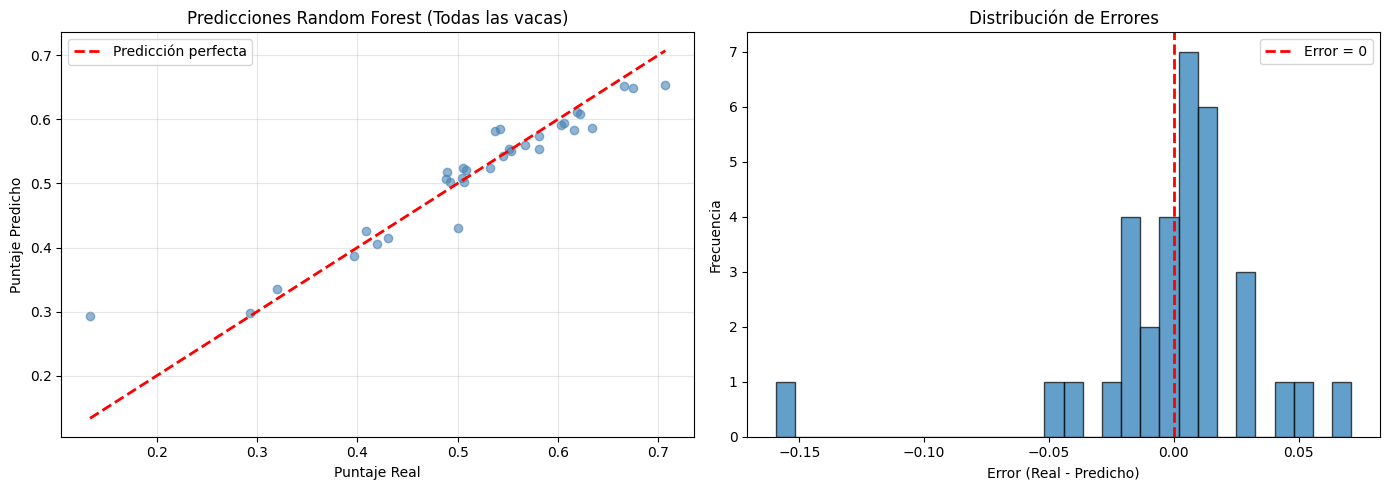


✓ Predicciones guardadas: datos/predicciones_random_forest.csv

=== RESUMEN ESTADÍSTICO ===
Error medio: 0.0001
Error absoluto medio: 0.0231
Error porcentaje medio: 7.03%


In [13]:
# Generar predicciones para todas las vacas
y_pred_all = rf_model.predict(X)

# Crear dataframe con resultados
predictions_df = pd.DataFrame({
    ('ID', 'ID Vaca'): df_final[('ID', 'ID Vaca')],
    ('Ranking', 'PuntajeFinal_Real'): y,
    ('Ranking', 'PuntajeFinal_Predicho'): y_pred_all,
    ('Ranking', 'Error'): y - y_pred_all,
    ('Ranking', 'Error_Porcentaje'): ((y - y_pred_all) / y * 100).abs()
})

# Ordenar por error descendente
predictions_df = predictions_df.sort_values(('Ranking', 'Error_Porcentaje'), ascending=False)

print("✓ Predicciones generadas para todas las vacas")
print("\nTop 10 vacas con mayor error:")
print(predictions_df.head(10))

# Visualizar predicciones
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: Real vs Predicho (todas las vacas)
axes[0].scatter(predictions_df[('Ranking', 'PuntajeFinal_Real')], 
                predictions_df[('Ranking', 'PuntajeFinal_Predicho')], 
                alpha=0.6, color='steelblue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Puntaje Real')
axes[0].set_ylabel('Puntaje Predicho')
axes[0].set_title('Predicciones Random Forest (Todas las vacas)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma de errores
axes[1].hist(predictions_df[('Ranking', 'Error')], bins=30, edgecolor='black', alpha=0.7)
axes[1].axvline(0, color='r', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_xlabel('Error (Real - Predicho)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Errores')
axes[1].legend()

plt.tight_layout()
plt.show()

# Guardar predicciones
predictions_df.to_csv('datos/predicciones_random_forest.csv', index=False)
print("\n✓ Predicciones guardadas: datos/predicciones_random_forest.csv")

# Resumen estadístico
print("\n=== RESUMEN ESTADÍSTICO ===")
print(f"Error medio: {predictions_df[('Ranking', 'Error')].mean():.4f}")
print(f"Error absoluto medio: {predictions_df[('Ranking', 'Error')].abs().mean():.4f}")
print(f"Error porcentaje medio: {predictions_df[('Ranking', 'Error_Porcentaje')].mean():.2f}%")